# Optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# These are some parameters to make figures nice (and big)

#%matplotlib inline
#%config InlineBackend.figure_format = 'retina' 
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Theory

In this notebook we will briefly consider the more general problem of fitting a model $\tilde y(\theta)$ to some obervations $y$, where $\theta$ are the model parameters

If the model is nonlinear, we will not be able to write simple, analytical estimator, so we will look for a numerical solution. This is very common for machine learning problems, where we cannot compute an optimal solution algebraically. 

We will generally fit the parameters by minimizing the misfit, i.e. by minimizing a cost function $J(\theta,y)$:

$$\hat\theta =\text{argmin } J(\theta,y)$$ 

A typical choice for the cost function is the least-squares cost function. If the errors are independent and normally distributed this is motivatd by maximum likelihood theory. However, this is generally a suitable function that can be useful even if there is no theoretical underpinning. For a set of observations $y(t_j)$, the cost function becomes
$$ J\left[\theta,y(t_j)\right]=\sum_j \left[\tilde y(\theta,t_j)-y(t_j)\right]^2$$

For now, we will use a simple python optimiziation method to minimize the cost function. There are several such methods, but they all behave the same. They require a cost function J, that is a function of the parameters, and needs to be minimized, and an initial condition $\theta_i$.

```
theta_hat=optimize.minimize(J,theta_init,args)
```

# Example Model
Consider the model $\tilde y(t)=y_0\cdot \exp (-t/\tau)$
with parameters $\theta =\{y_0,\tau\}$, which can be also written a 

$$\tilde y(\theta,t)=\theta_1 \cdot \exp (-t/\theta_2)$$

Let's first visualize the model, before fitting it to some synthetic observations

In [2]:
def model(theta,t):
    y_model=theta[0]*np.exp(-t/theta[1])
    return y_model

In [3]:
# Let's choose some parameters and generate some pseudo-observations
y0_true   =3;
tau_true  =3;
theta_true=[y0_true,tau_true];
sigma_e   =0.4;   # errors

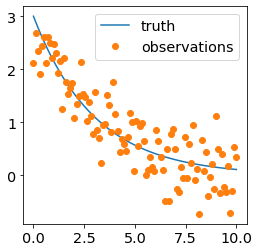

In [4]:
# plot model and pseudo observations
t=np.linspace(0,10,100)
e=stats.norm.rvs(0,sigma_e,100)

y_true=model(theta_true,t)
y_obs =y_true+e

fig,ax=plt.subplots(1,1,figsize=[4,4])
ax.plot(t,y_true,'-',label='truth')
ax.plot(t,y_obs,'o',label='observations')
ax.legend();

**Let's plot the model for some first guesses**

In [5]:
theta=[[3.5,6],
       [5,3],
       [3.3,2.4]]

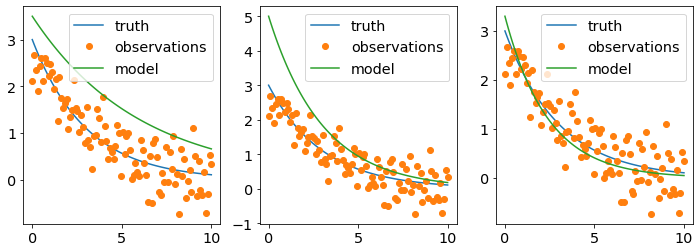

In [6]:
#Example of models
fig,ax=plt.subplots(1,3,figsize=[12,4])

for j in range(3):
    y =model(theta[j],t)
    ax[j].plot(t,y_true,'-',label='truth')
    ax[j].plot(t,y_obs,'o',label='observations')
    ax[j].plot(t,y,'-',label='model')
    ax[j].legend()

# Cost Function

We will generally fit the parameters by minimizing themisfit, i.e. by minimizing a cost function $J(\theta,y)$:

$$\hat\theta =\text{argmin } J(\theta,y)$$ 

A typical choice for the cost function is the least-squares cost function. If the errors are independent and normally distributed this is motivatd by maximum likelihood theory. However, this is generally a suitable function that can be useful even if there is no theoretical underpinning. For a set of observations $y(t_j)$, the cost function becomes

$$ J(\theta,y(t_j))=\sum_j \left[\tilde y(\theta,t_j)-y(t_j)\right]^2$$


In [7]:
def Jcost(theta,y_obs,t):
    Jcost=np.sum( (y_obs-model(theta,t))**2)

    return Jcost

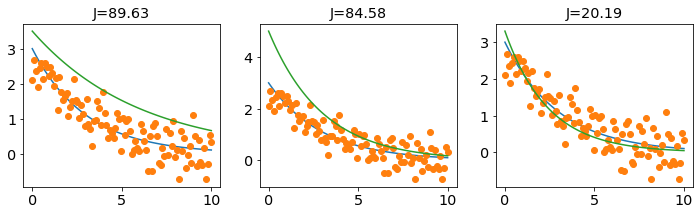

In [8]:
fig,ax=plt.subplots(1,3,figsize=[12,3])

for j in range(3):
    y =model(theta[j],t)
    J=Jcost(theta[j],y_obs,t)
    ax[j].plot(t,y_true,'-',label='truth')
    ax[j].plot(t,y_obs,'o',label='observations')
    ax[j].plot(t,y,'-',label='model')
    
    title_str='J='+np.array2string(J,precision=2)
    ax[j].set_title(title_str)

## Visualize the Cost Function

In [9]:
N1=21;
N2=20;
y0_vec=np.linspace(1.5,4,N1);
tau_vec=np.linspace(1,4,N2);

J=np.zeros(shape=[N1,N2]);

for j1 in range(N1):
    for j2 in range(N2):
        theta=[y0_vec[j1],tau_vec[j2]];
        J[j1,j2]=Jcost(theta,y_obs,t);           

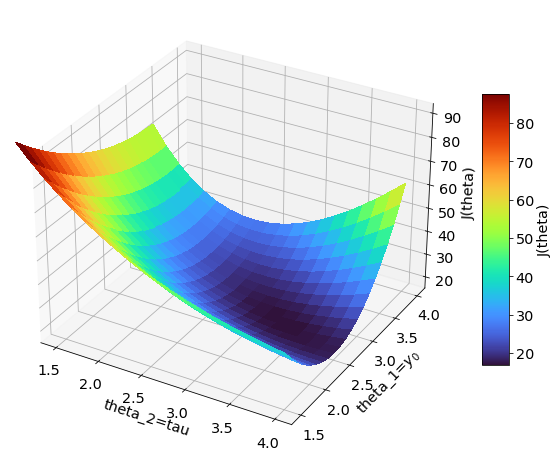

In [10]:
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=[10,10])
X,Y=np.meshgrid(tau_vec,y0_vec)

surf=ax.plot_surface(X,Y,J,cmap=cm.get_cmap('turbo'),
                       linewidth=0, antialiased=False)

ax.invert_yaxis()
ax.invert_xaxis()
ax.set_ylabel('theta_1=$y_0$');
ax.set_xlabel('theta_2=tau');
ax.set_zlabel('J(theta)');
fig.colorbar(surf, shrink=0.5, aspect=10,label='J(theta)');

/var/folders/pr/3_264g5j1d15jdsjfgsqbdj80000gp/T/ipykernel_55490/638297164.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  surf=ax.pcolormesh(X,Y,J,cmap=cm.get_cmap('turbo'),


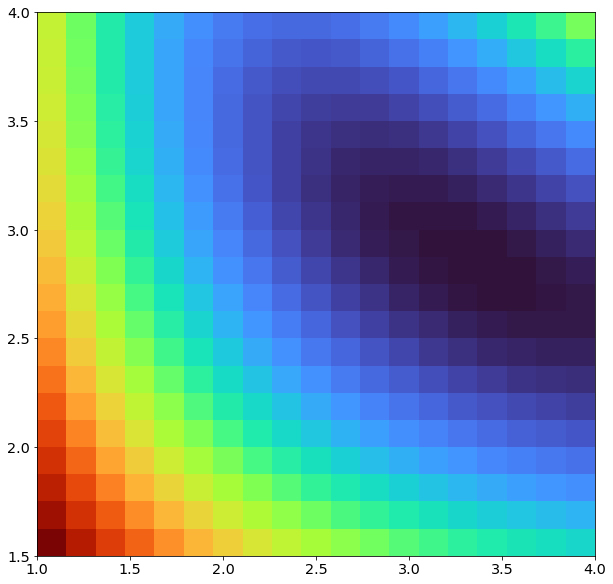

In [11]:
from matplotlib import cm

fig, ax = plt.subplots(figsize=[10,10])
X,Y=np.meshgrid(tau_vec,y0_vec)

surf=ax.pcolormesh(X,Y,J,cmap=cm.get_cmap('turbo'),
                       linewidth=0, antialiased=False)

# Optimize using scipy package

In [96]:
from scipy import optimize 
theta_i=[2,1.2]
theta_hat=optimize.minimize(Jcost,theta_i,args=(y_obs,t)).x;

print(theta_hat)
print(theta_true)


[2.98622618 3.12972728]
[3, 3]


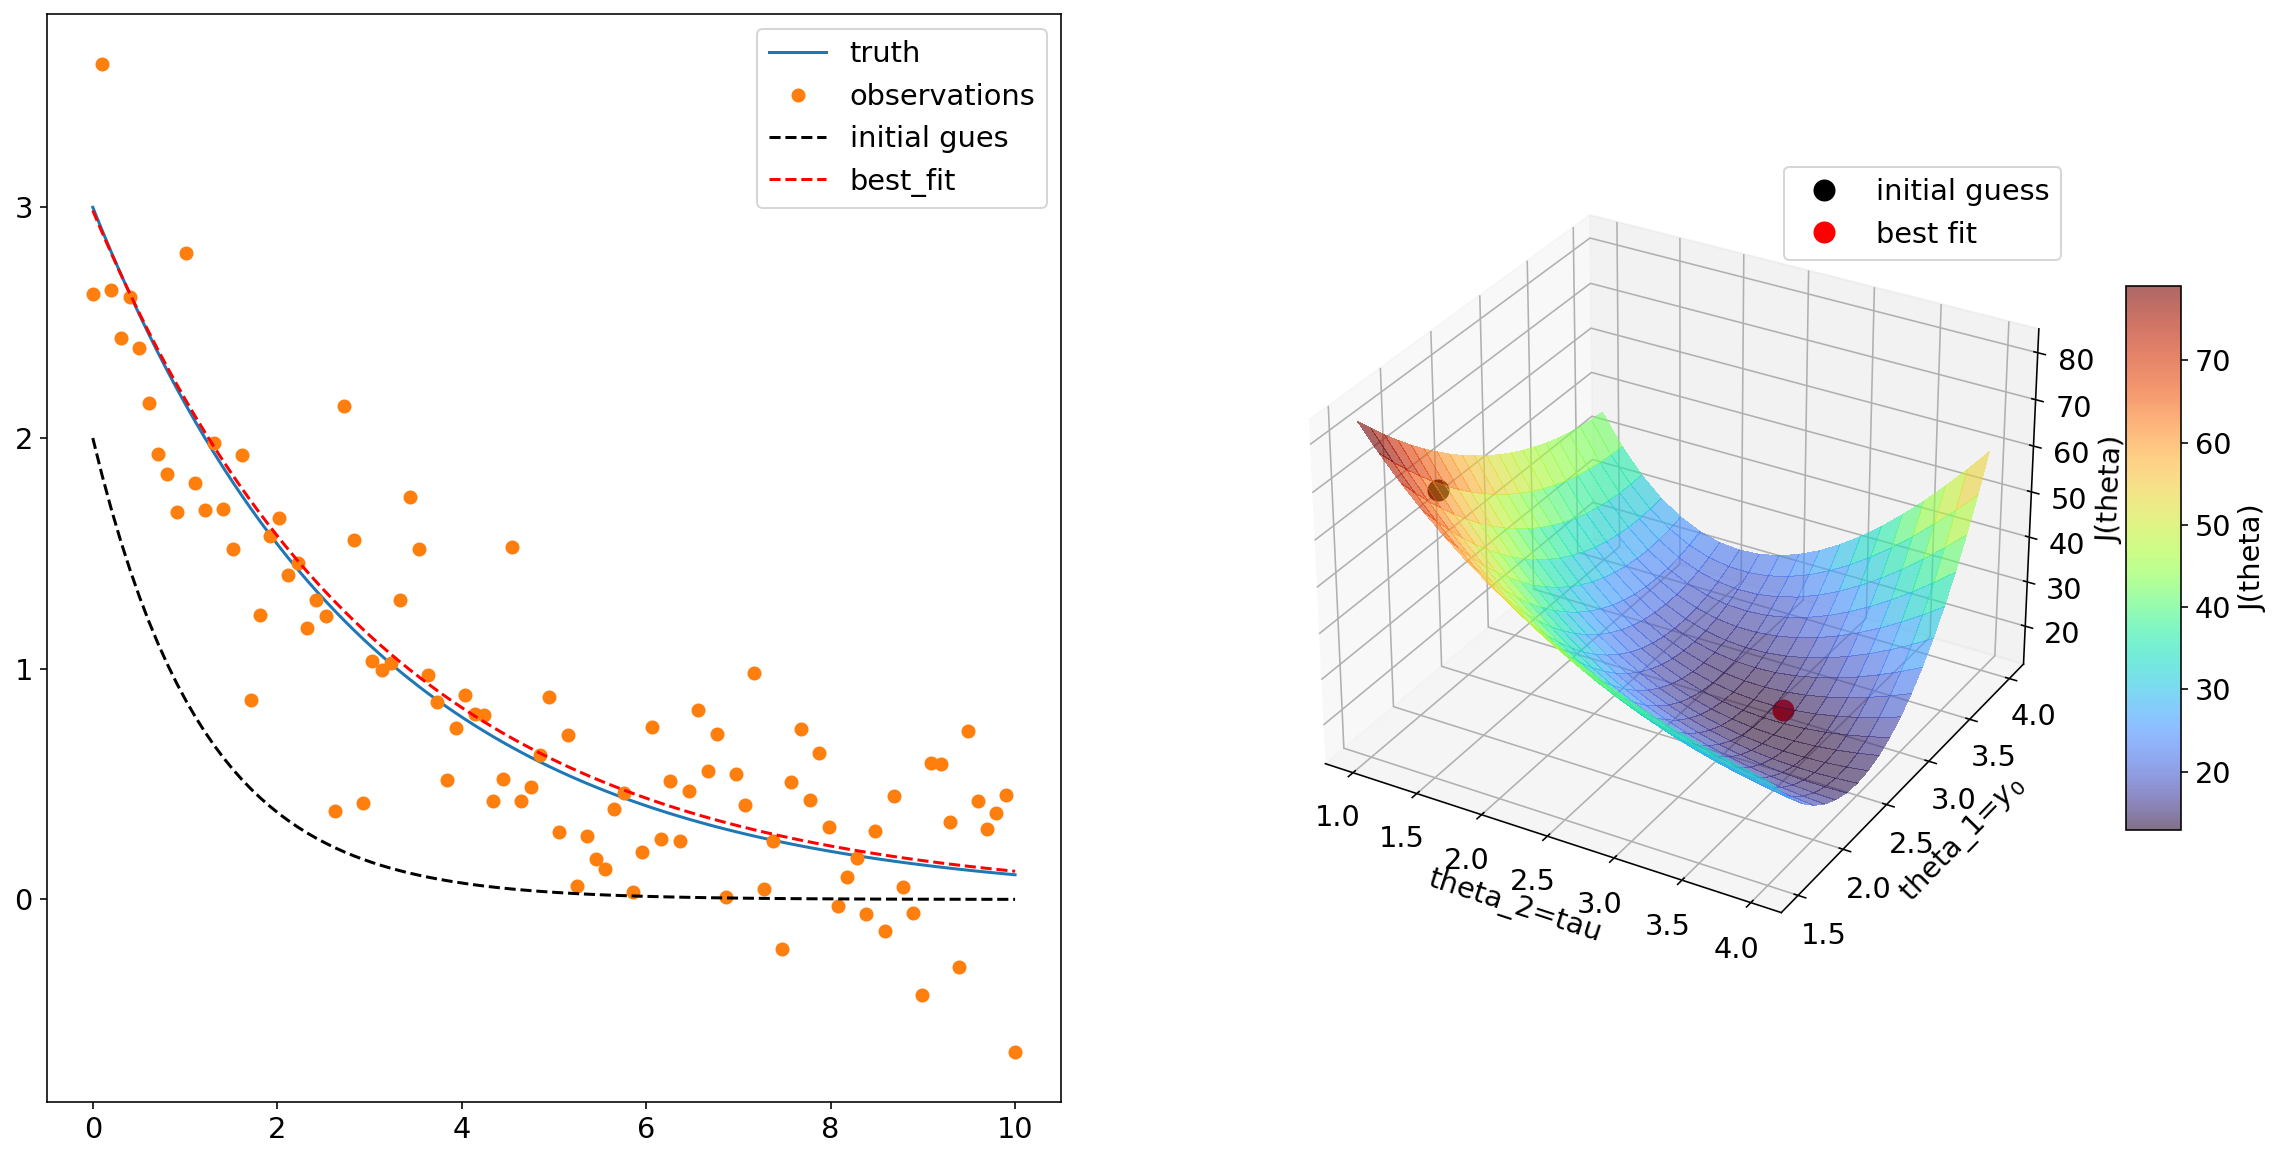

In [112]:
y_true=model(theta_true,x)
y_obs =y_true+e

fig,ax=plt.subplots(1,2,figsize=[20,10])
ax[0].plot(x,y_true,'-',label='truth')
ax[0].plot(x,y_obs,'o',label='observations')
ax[0].plot(x,model(theta_i,x),'k--',label='initial gues')
ax[0].plot(x,model(theta_hat,x),'r--',label='best_fit')
ax[0].legend()

ax=plt.subplot(1,2,2,projection='3d')
X,Y=np.meshgrid(tau_vec,y0_vec)

surf=ax.plot_surface(X,Y,J,cmap=cm.get_cmap('turbo'),
                       linewidth=0, antialiased=False,alpha=0.6)

ax.invert_yaxis()
ax.invert_xaxis()
ax.set_ylabel('theta_1=$y_0$');
ax.set_xlabel('theta_2=tau');
ax.set_zlabel('J(theta)');
#ax.grid(False)
plt.colorbar(surf,ax=ax, shrink=0.5, aspect=10,label='J(theta)');
ax.plot3D(theta_i[1],theta_i[0],Jcost(theta_i,y_obs,t),'ko',markersize=10,label='initial guess');
ax.plot3D(theta_hat[1],theta_hat[0],Jcost(theta_hat,y_obs,t),'ro',markersize=10,label='best fit');
ax.legend();

# Summary
Most of the code above is for plotting purposes. The actual optimization is done in ver few lines of code, summarized below

In [98]:
# define your model
def model(theta,t):
    y_model=theta[0]*np.exp(-t/theta[1])
    return y_model
# define your cost function, as a function of the parameter vector
def Jcost(theta,y_obs,t):
    Jcost=np.sum( (y_obs-model(theta,t))**2)
    return Jcost

# choose an initial guess
theta_init=[2,1.2]

#optimize
theta_hat=optimize.minimize(Jcost,theta_init,args=(y_obs,t)).x;
